# Electrodinámica Cuántica de Circuitos

## Contenido

1. [Introducción](#intro)
2. [La transformación de Schrieffer-Wolff](#tswt)
3. [Diagonalización de bloques del hamiltoniano de Jaynes-Cummings](#bdotjch)
4. [Transmon completo](#full-transmon)
5. [Unidad Qubit con cQED](#qdwcqed)
6. [La puerta de enredo de resonancia cruzada](#tcreg)

## 1. Introducción<a id="intro"></a>

Por analogía con la electrodinámica cuántica de cavidades (CQED), el circuito QED (cQED) aprovecha el hecho de que se puede usar un modelo simple para describir la interacción de un átomo con una cavidad óptica y un qubit con un resonador de microondas. Este modelo incluye el número de fotones en la cavidad/resonador, el estado del átomo/qubit y la interacción del dipolo eléctrico entre el átomo/qubit y la cavidad/resonador. Como vimos en la última sección, los transmons son en realidad sistemas de varios niveles, pero es posible restringirnos a los estados básicos $|0\rangle = |g\rangle$ y primero excitados $|1\rangle = |e\rangle$ debido a la anarmonía del transmón. Por lo tanto, podemos describir el transmon como un qubit descrito por las matrices de espín de Pauli $$ \sigma^x = \begin{pmatrix} 0 &amp; 1 \ 1 &amp; 0 \end{pmatrix} \qquad \sigma^y = \begin{pmatrix } 0 &amp; -i \ i &amp; 0 \end{pmatrix} \qquad \sigma^z = \begin{pmatrix} 1 &amp; 0 \ 0 &amp; -1 \end{pmatrix} \qquad $$ que generan rotaciones alrededor de los respectivos ejes la esfera de Bloch. En ese caso, el modelo más simple para describir esta interacción es el hamiltoniano de Jaynes-Cummings en la aproximación de onda rotatoria, $$ H_{\rm JC}^{\rm (RWA)}/\hbar = \omega_r a^\dagger a + \frac{1}{2} \omega_q \sigma_z + g(a^\dagger \sigma^- + a \sigma^+). $$ donde $\omega_r$ y $\omega_q$ son las frecuencias del resonador y "qubit", respectivamente, $a$ ($a^\dagger$) es el operador de aniquilación (creación) de fotones del resonador, y $g$ es el acoplamiento del dipolo eléctrico (la mitad de la división Rabi del vacío). Tenga en cuenta que ahora estamos omitiendo los sombreros de los operadores. Aquí, el primer término corresponde al número de fotones en el resonador, el segundo término corresponde al estado del qubit y el tercero es la interacción del dipolo eléctrico, donde $\sigma^\pm = (1/2)(\ sigma^x \mp i\sigma^y)$ es el operador de subida/bajada de qubit. (Tenga en cuenta que los signos están invertidos de los de los operadores de elevación/descenso de *giro* , como se explicó en el capítulo anterior).

Este hamiltoniano se puede resolver exactamente, y las soluciones son estados híbridos de qubit/resonador en los que una excitación (ya sea un fotón en el resonador o un estado excitado del qubit) cambia entre los dos a una velocidad de $g$ cuando están en resonancia ( $\omega_r = \omega_q$). Por ejemplo, $a^\dagger \sigma^-$ en el tercer término crea un fotón en el resonador y reduce el qubit de $|1\rangle$ a $|0\rangle$, mientras que $a\sigma^ El término +$ destruye un fotón en los resonadores y excita el qubit de $|0\rangle$ a $|1\rangle$. Si bien es interesante, para nuestra computadora cuántica queremos tratar con qubits, y no con estos estados híbridos. Esto significa que queremos pasar a regímenes en los que el resonador actúe como una perturbación del qubit (y viceversa), de modo que sus propiedades simplemente se "vistan" con la presencia del otro. Usando un tipo de teoría de la perturbación, llamada transformación de Schrieffer-Wolff (SW), podemos calcular las propiedades del qubit y el resonador en el régimen que deseamos operar. Aquí se debe tener en cuenta que tratar el transmon como un qubit es ilustrativo por razones pedagógicas, pero se aplican las mismas técnicas cuando se consideran todos los niveles del transmon. Los niveles más altos del transmon tienen efectos profundos y deben tenerse en cuenta al diseñarlos y simularlos. 

## 2. La transformación de Schrieffer-Wolff<a id="tswt"></a>


<summary>Ecuación de Schrödinger (Haga clic aquí para ampliar)</summary> Los problemas de la mecánica cuántica suelen ser los de diagonalizar una ecuación de valor propio hamiltoniano $$ H\psi_m = E_m \psi_m \qquad {\rm for} \quad 1 \le m \le n $$ donde $\psi_m$ son los estados propios con valor propio $E_m$. Esta consiste en encontrar una matriz unitaria $U$, tal que $H' = UHU^\daga$ sea diagonal. Entonces la ecuación de valor propio $$ \hat{H} \psi_m = E_m \psi_m \Longrightarrow UHU^\dagger U \psi_m = E_m U \psi_m \Longrightarrow H' \psi_m' = E_m \psi_m' $$ donde $\psi_m' = U\psi_m$ son los estados propios transformados y $$ H' = \begin{pmatrix} E_1 &amp; 0 &amp; \cdots &amp; 0 \\ 0 &amp; E_2 &amp; \cdots &amp; 0 \\ \vdots &amp; \vdots &amp; \ddots &amp; 0 \\ 0 &amp; 0 &amp; \cdots &amp; E_n \end{pmatrix} $$ es el hamiltoniano diagonalizado.

Con la transformación SW, en lugar de diagonalizar el hamiltoniano, buscamos *diagonalizarlo en bloque* . Supongamos que tenemos un hamiltoniano que se puede dividir en una parte diagonal y una perturbación $$ H \quad = \quad \underbrace{\begin{pmatrix} \Box &amp; &amp; &amp; &amp; &amp; &amp; &amp; \ &amp; \Box &amp; &amp; &amp; &amp; &amp; \ &amp; &amp; \Box &amp; &amp; &amp; &amp; \ &amp; &amp; &amp; \Box &amp; &amp; &amp; \ &amp; &amp; &amp; &amp; &amp; \Box &amp; &amp; \ &amp; &amp; &amp; &amp; &amp; \Box &amp; \ &amp; &amp; &amp; &amp; &amp; &amp; &amp; \Box \end{pmatrix}} *\text{diagonal} \quad + \quad \underbrace{\begin{pmatrix} \times &amp; \times &amp; \times &amp; \times &amp; \cdot &amp; \cdot &amp; \cdot \ \times &amp; \times &amp; \times &amp; \times &amp; \cdot &amp; \cdot &amp; \cdot \ \times &amp; \times &amp; \times &amp; \times &amp; \cdot &amp; \cdot &amp; \cdot \ \times &amp; \times &amp; \times &amp; \times &amp; \cdot &amp; \cdot &amp; \ cdot \ \cdot &amp; \cdot &amp; \cdot &amp; \cdot &amp; \times &amp; \times &amp; \times \ \cdot &amp; \cdot &amp; \cdot &amp; \cdot &amp; \times &amp; \times &amp; \times \ \cdot &amp; \cdot &amp; \cdot &amp; \cdot &amp; \times &amp; \times &amp; \times \end{pmatrix}}* \text{perturbación} $$ y luego escribe la perturbación como $H_1 + H_2$ de modo que $H = H_0 + H_1 + H_2$, con $H_0$ diagonal, $H_1$ bloque-diagonal y $H_2$ no-bloque diagonal, y tenemos $$ H \quad = \quad \underbrace{\begin{pmatr ix} \Box &amp; &amp; &amp; &amp; &amp; &amp; &amp; \ &amp; \Box &amp; &amp; &amp; &amp; &amp; \ &amp; &amp; \Box &amp; &amp; &amp; &amp; \ &amp; &amp; &amp; \Box &amp; &amp; &amp; \ &amp; &amp; &amp; &amp; \Box &amp; &amp; \ &amp; &amp; &amp; &amp; &amp; \Box &amp; \ &amp; &amp; &amp; &amp; &amp; &amp; \Box \end{pmatrix}} *\text{diagonal} \quad + \quad \underbrace{\begin{pmatrix} \times &amp; \times &amp; \times &amp; \times &amp; &amp; &amp; \ \veces &amp; \veces &amp; \veces &amp; \veces &amp; &amp; &amp; \ \veces &amp; \veces &amp; \veces &amp; \veces &amp; &amp; &amp; \ \veces &amp; \veces &amp; \veces &amp; \veces &amp; &amp; &amp; \ &amp; &amp; &amp; &amp; \times &amp; \times &amp; \times \ &amp; &amp; &amp; &amp; \times &amp; \times &amp; \times \ &amp; &amp; &amp; &amp; \times &amp; \times &amp; \times \end{pmatrix}}* \text{block diagonal} \quad + \quad \underbrace{\begin{pmatrix} &amp; &amp; &amp; &amp; \cdot &amp; \cdot &amp; \cdot \ &amp; &amp; &amp; &amp; \cdot &amp; \cdot &amp; \cdot \ &amp; &amp; &amp; &amp; \cdot &amp; \cdot &amp; \cdot \ &amp; &amp; &amp; &amp; \cdot &amp; \cdot &amp; \cdot \ \cdot &amp; \cdot &amp; \cdot &amp; \cdot &amp; &amp; &amp; \ \cdot &amp; \cdot &amp; \cdot &amp; \cdot &amp; &amp; &amp; \ \cdot &amp; \cdot &amp; \ cdot &amp; \cdot &amp; &amp; &amp; \end{pmatrix}}_\text{bloquear fuera de la diagonal} $$

La diagonalización de bloques $H$ consiste en encontrar un operador $S$ tal que

$$ H_{\rm eff} = e^{iS} H e^{-iS} = \sum_{m=0}^\infty \frac{1}{m!} [H, S]^{(m )} = \sum_{m=0}^\infty \lambda^m H^{(m)}, $$

donde $H^{(m)}$ son aproximaciones sucesivas a $H$ (con $H^{(0)} = H_0$) y el conmutador generalizado se define recursivamente como

$$ [H,S]^{(m)} = [[H,S]^{(m-1)},S] \qquad {\rm con} \qquad [H,S]^{(0) } = H.$$

Aquí tratamos a $S$ como una serie de Taylor con

$$ S = \sum_{m=1}^\infty \lambda^m S^{(m)} $$

para realizar un seguimiento de la orden $\lambda$. Luego, expandiendo el hamiltoniano efectivo como una perturbación de $H_1+H_2$ a segundo orden en $\lambda$,

$$ H_{\rm eff} = H_0 + \lambda (H_1+H_2) + \left[H_0 + \lambda(H_1+H_2), \lambda S^{(1)}\right]

- \frac{1}{2} \left[ \left[ H_0 + \lambda(H_1+H_2), \lambda S^{(1)}\right], \lambda S^{(1)}\right]
- \left[H_0 + \lambda(H_1+H_2), \lambda^2 S^{(2)}\right] + \ldots \ \approx H_0 + \lambda \left( H_1 + H_2 + \left[H_0, S ^{(1)}\derecho] \derecho)
- \lambda^2 \left( \left[H_1+H_2, S^{(1)}\right] + \frac{1}{2} \left[ \left[H_0, S^{(1)}\right ], S^{(1)}\derecha] + \izquierda[H_0, S^{(2)}\derecha]\derecha) $$

Ahora sabemos que $S$ debe estar en bloque fuera de la diagonal y anti-hermitiano para forzar a los elementos de bloque fuera de la diagonal de $H_{\rm eff}$ a desaparecer, debemos tener eso

$$ H_{\rm eff}^{\rm off-diag} = \sum_{m=0}^\infty \frac{1}{(2m+1)!} [\underbrace{H_0 + H_1} *\text {block diag}, S]^{(2m+1)} + \sum* {m=0}^\infty \frac{1}{(2m)!} [\underbrace{H_2}_\text{block off- diag}, S]^{(2m)} \equiv 0, $$

teniendo en cuenta que todos los términos de la primera serie están en bloque fuera de la diagonal y todos los de la segunda serie están en bloque diagonal. Esto se debe a que el conmutador de una matriz diagonal de bloque y una matriz fuera de la diagonal de bloque está fuera de la diagonal de bloque y el conmutador de dos matrices fuera de la diagonal de bloque es una diagonal de bloque. Expandiendo esto al conmutador generalizado, podemos ver que $[H^0 + H^1, S]^{(n)}$ con $n$ impar siempre debe bloquearse fuera de la diagonal, así como $[H^2 , S]^{(n)}$ con incluso $n$. Ahora, expandir la parte fuera de la diagonal del hamiltoniano a rendimientos de segundo orden

$$ H_{\rm eff}^{\rm off-diag} = \left[ H_0 + \lambda H_1, \lambda S^{(1)} \right]+\lambda H_2 + \left[H_0 + \lambda H_1, \lambda^2 S^{(2)}\right]

- \frac{1}{3!} \left[ H_0+\lambda H_1, \lambda S^{(1)}\right]^{(3)} + \frac{1}{2!} \left[ \lambda H_2, \lambda S^{(1)}\right]^{(2)} \ = \lambda \left( \left[ H_0, S^{(1)} \right] + H_2 \right) + \lambda ^2 \left( \left[H_1, S^{(1)} \right] + \left[H_0, S^{(2)}\right]\right) + \ldots. $$ Dado que cada orden de $\lambda$ debe ser idénticamente cero, las siguientes ecuaciones determinan $S^{(m)}$, $$ [H_0, S^{(1)}] = -H_2 \qquad [H_0, S^{(2)}] = -[H_1, S^{(1)}] \qquad [H_0, S^{(3)}] = -[H_1, S^{(2)}] - \frac {1}{3} [[H_2, S^{(1)}], S^{(1)}], $$ donde nuestro ansatz que satisfizo estas ecuaciones está garantizado como único por el trabajo de Winkler. Entonces nuestro hamiltoniano efectivo se convierte en

$$ H_{\rm efecto} = H_0+H_1+[H_2,S^{(1)}] + \frac{1}{2} [[H_0, S^{(1)}], S^{(1 )}] + \ldots = H_0+H_1+\frac{1}{2}[H_2,S^{(1)}] + \ldots $$

donde el hamiltoniano efectivo se calcula aquí a segundo orden y hemos tomado $\lambda\a 1$.

## 3. Diagonalización de bloques del hamiltoniano de Jaynes-Cummings<a id="bdotjch"></a>

El uso de la transformación SW consta de dos problemas: 1) encontrar el ansatz correcto y 2) realizar los cálculos. En la mayoría de los ejemplos, se hace y confirma *a postori* un ansatz de forma similar (es decir, antihermitiano) a las partes fuera de la diagonal. Recientemente, el manuscrito [Un método sistemático para la transformación de Schrieffer-Wolff y sus generalizaciones](http://www.arxiv.org/abs/2004.06534) ha aparecido en arXiv, lo que certifica que proporciona sistemáticamente el ansatz y lo aplica a numerosos sistemas (incluido el hamiltoniano de Jaynes-Cumming a continuación).

Como tal, el *generador* $\eta$ se calcula como $\eta = [H_0, H_2]$. Al mantener los coeficientes escalares de $\eta$ sin determinar, entonces $S^{(1)}$ se puede calcular como el $\eta$ específico que satisface $[H_0, \eta]=H_2$. Tenga en cuenta que la hermiticidad de $H_0$ y $H_2$ garantiza la antihermiticidad de $\eta$ y, por lo tanto, $S^{(1)}$.

Para facilitar los cálculos tediosos, usaremos el paquete Python [`sympy`](http://www.sympy.org) para matemáticas simbólicas.

In [10]:
# import SymPy and define symbols
import sympy as sp
sp.init_printing(use_unicode=True)
wr = sp.Symbol('\omega_r') # resonator frequency
wq = sp.Symbol('\omega_q') # qubit frequency
g = sp.Symbol('g', real=True) # vacuum Rabi coupling
Delta = sp.Symbol('Delta', real=True) # wr - wq; defined later

In [11]:
# import operator relations and define them
from sympy.physics.quantum.boson import BosonOp
a = BosonOp('a') # resonator photon annihilation operator
from sympy.physics.quantum import pauli, Dagger, Commutator
from sympy.physics.quantum.operatorordering import normal_ordered_form

# Pauli matrices
sx = pauli.SigmaX()
sy = pauli.SigmaY()
sz = pauli.SigmaZ()

# qubit raising and lowering operators, notice the spin and qubit ladder operators are inversed
splus = pauli.SigmaMinus()
sminus = pauli.SigmaPlus()

In [12]:
# define J-C Hamiltonian in terms of diagonal and non-block diagonal terms
H0 = wr*Dagger(a)*a - (1/2)*wq*sz; 
H2 = g*(Dagger(a)*sminus + a*splus); 
HJC = H0 + H2; HJC # print

In [13]:
# using the above method for finding the ansatz
eta = Commutator(H0, H2); eta

Como nota sobre `sympy` , necesitaremos usar los métodos <code>doit()</code> , `expand` , `normal_ordered_form` y `qsimplify_pauli` para proceder a tomar el conmutador, expandirlo en términos, ordenar normalmente los modos bosónicos (creación antes de la aniquilación) y simplificar el Álgebra de Pauli. Probar esto con rendimientos $\eta$

In [14]:
pauli.qsimplify_pauli(normal_ordered_form(eta.doit().expand()))

Ahora toma $A$ y $B$ como los coeficientes de $a^\dagger \sigma_-$ y $a\sigma_+$, respectivamente. Entonces el conmutador

In [15]:
A = sp.Symbol('A')
B = sp.Symbol('B')
eta = A * Dagger(a) * sminus - B * a * splus;
pauli.qsimplify_pauli(normal_ordered_form(Commutator(H0, eta).doit().expand()))

Esta expresión debe ser igual a $H_2$

In [16]:
H2

lo que implica $A = B = g/\Delta$ donde $\Delta = \omega_r - \omega_q$ es la desafinación de frecuencia entre el resonador y el qubit. Por lo tanto, se determina que nuestro $S^{(1)}$ es

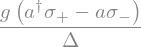

In [17]:
S1 = eta.subs(A, g/Delta)
S1 = S1.subs(B, g/Delta); S1.factor()

Entonces podemos calcular la corrección efectiva de segundo orden a $H_0$

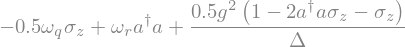

In [18]:
Heff = H0 + 0.5*pauli.qsimplify_pauli(normal_ordered_form(Commutator(H2, S1).doit().expand())).simplify(); Heff

Esto normalmente se escribe como $$ H_{\rm eff} = \frac{g^2}{2\Delta} \left(\omega_r + \frac{g^2}{\Delta}\sigma_z\right)a^ \dagger a - \frac{1}{2}\left(\omega_q -\frac{g^2}{\Delta}\right) \sigma_z $$ que muestra un cambio dependiente del estado por $\chi \equiv g ^2/\Delta$ de la frecuencia del resonador llamado cambio de *Stark ac* y un cambio en la frecuencia de qubit debido a las fluctuaciones del vacío cuántico llamado *cambio de Lamb* .

## 4. Transmon completo<a id="full-transmon"></a>

Debido a que estamos usando *transmons* en lugar de *qubits* , debemos tener cuidado de aplicar los términos de energía de orden superior al diseñar y simular dispositivos. El hamiltoniano transmon completo acoplado a los resonadores de lectura es

$$ H^{\rm tr} = \omega_r a^\dagger a + \sum_j \omega_j |j\rangle\langle j| + g\izquierda(a^\daga c + ac^\daga \derecha), $$

donde ahora $c = \sum_j \sqrt{j+1}|j\rangle\langle j+1|$ es el operador de reducción transmon. De manera similar, tomando los subconjuntos de interacción débil $A$ como los modos transmon pares y $B$ como los modos transmon impares. Usando el ansatz

$$ S^{(1)} = \sum_j \alpha_j a^\dagger \sqrt{j+1}|j\rangle\langle j+1| - \alpha_j^* a \sqrt{j+1}|j+1\rangle\langle j|, $$

uno puede proceder a lo largo de una versión más desordenada del hamiltoniano de Jaynes-Cummings. Con algo de esfuerzo se puede demostrar que el hamiltoniano efectivo de segundo orden es

$$ H^{\rm tr}_{\rm eff} = \left( \omega_r + \sum_j \frac{g^2(\omega_r-\omega+\delta)}{(\omega_r-\omega-\delta j)(\omega_r - \omega - \delta(j-1))} |j\rangle\langle j| \right) a^\dagger a + \sum_j \left[ j\omega + \frac{\delta} {2} (j-1)j + \frac{jg^2}{\omega-\omega_r+(j-1)\delta} \right]|j\rangle\langle j|. $$

## 5. Unidad Qubit con cQED<a id="qdwcqed"></a>

Siguiendo lo de [Blais *et al* (2004)](https://arxiv.org/abs/cond-mat/0402216) , modelamos el impulso hamiltoniano como $$ H^d(t) = \xi(t)\left( a^\dagger e^{-i\omega_d t} + ae^{ i\omega_d t}\right). $$ Siguiendo el tratamiento en el [Ph.D. disertación de Lev Bishop](https://arxiv.org/abs/1007.3520) , la unidad actúa sobre el qubit a través del operador de Glauber $$ D(\alpha) = e^{\alpha(t) a^\dagger - \alpha^ *(t) a}. $$ Pasando al hamiltoniano de Jaynes-Cumming girando a la frecuencia de excitación, $$ H = \Delta_r a^\dagger a - \frac{1}{2} \Delta_q \sigma^z + g(a^\dagger \sigma ^- + a\sigma^+) + \xi(t)(a^\dagger + a) $$ con $\Delta_r = \omega_r - \omega_d$ y $\Delta_q = \omega_q - \omega_d$. Aplicando el Lema de Hadamard a conmutadores anidados, $$ e^{A}BA^{-A} = B + [A,B] + \frac{1}{2!} [A,[A,B]] + \frac {1}{3!}[A,[A,[A,B]]] + \ldots $$ vemos que $$ D^\dagger a^{(\dagger)} D = \exp{-\alpha (t) a^\daga + \alpha^* (t) a} a^{(\daga)}\exp{\alpha(t) a^\daga - \alpha^ *(t) a} = a^{( \daga)} + \left[-\alpha(t) a^\daga + \alpha^* (t) a, a^{(\daga)}\right] + \frac{1}{2!}\left [-\alpha(t) a^\daga + \alpha^ *(t) a, \left[-\alpha(t) a^\daga + \alpha^* (t) a, a^{(\daga)} \right]\right] + \ldots = a^{(\dagger)} + \alpha^{(*)} $$ y

$$ D^\daga a^\daga a D = a^\daga a + \left[-\alpha(t) a^\daga + \alpha^ *(t) a, a^\daga a\right] + \frac{1}{2!}\left[-\alpha(t) a^\dagger + \alpha^* (t) a, \left[-\alpha(t) a^\dagger + \alpha^ *(t ) a, a^\daga a\right]\right] + \ldots = a^\daga a + \alpha(t)a^\daga + \alpha^* (t)a + |\alpha(t)|^ 2 $$

Para que podamos transformar el hamiltoniano

$$ \tilde{H} = D^\dagger HD - iD^\dagger \dot{D} = \Delta_r\left(a^\dagger a + \alpha(t)a^\dagger + \alpha^ *(t )a + |\alpha(t)|^2\right) - \frac{1}{2} \Delta_q \sigma^z \ + g\left((a^\dagger + \alpha^* (t))\ sigma^- + (a+\alpha(t))\sigma^+\right) + \xi(t)\left(a^\dagger + \alpha^ *(t) + a + \alpha(t) \right) - i\left(\dot{\alpha}(t) a^\dagger - \dot{\alpha}^* (t) a\right) \ = \Delta_r a^\dagger a - \frac{1}{2 }\Delta_q \sigma^z + g\left((a^\dagger + \alpha^ *(t))\sigma^- + (a+\alpha(t))\sigma^+\right) \ +\xi( t)\left(a^\dagger + a \right) + \Delta_r\left(\alpha(t)a^\dagger + \alpha^* (t)a\right)- i\left(\dot{\alpha }(t) a^\daga - \dot{\alpha}^*(t) a\right) $$

donde se han eliminado los términos de no operador. La última línea se puede poner a cero si elegimos

$$ -i\dot{\alpha}(t) + \Delta_r \alpha(t) + \xi(t) = 0, $$

y finalmente introduciendo la frecuencia Rabi $\Omega(t) = 2g\alpha(t)$, llegamos a

$$ \tilde{H} = \Delta_r a^\daga a - \frac{1}{2}\Delta_q \sigma^z + g\left(a^\daga\sigma^- + a\sigma^+\ derecha) +\frac{1}{2} \left( \Omega^*(t)\sigma^- + \Omega(t) \sigma^+\right). $$

Dado que la parte impulsora del hamiltoniano está bloqueada fuera de la diagonal, podemos realizar una transformación de Schrieffer-Wolff en ella (para una unidad real $\Omega^*(t) = \Omega(t)$) y sumarla a la efectiva hamiltoniano,

$$ [\tilde{H}^d, S^{(1)}] = -\frac{\Omega(t)}{2} \left[ (\sigma^- + \sigma^+),\frac {g}{\Delta}\left( a^\daga \sigma^- - a\sigma^+\right)\right] = \frac{g\Omega(t)}{2\Delta}(a + a ^\daga)\sigma^z $$

por lo que el hamiltoniano efectivo se convierte en

$$ \tilde{H}_{\rm eff} = \left( \Delta_r + \frac{g^2}{\Delta}\sigma^z\right) a^\dagger a - \frac{1}{ 2}\left(\Delta_q - \frac{g^2}{\Delta}\right) \sigma^z + \frac{\Omega(t)}{2}\sigma^x

- \frac{g\Omega(t)}{4\Delta}(a + a^\daga)\sigma^z. $$

Tenga en cuenta aquí que para eliminar las rotaciones $z$, uno debe conducir a la frecuencia de qubit desplazada por Lamb. El término $\sigma^z$ adicional es pequeño porque $\Delta \gg g$ en el régimen dispersivo.

## 6. La puerta de enredo de resonancia cruzada<a id="tcreg"></a>

Conducir el qubit uno a la frecuencia del qubit dos se puede escribir como

$$ H^d(t) = \frac{\Omega(t)}{2} \left( \sigma_1^+ e^{-i\tilde{\omega}_2 t} + \sigma_1^- e^{ i\tilde{\omega}_2 t}\right). $$

Ahora, necesitamos aplicar Schrieffer-Wolff al término impulsor para obtener el hamiltoniano efectivo y luego hacer el RWA en la frecuencia $\tilde{\omega}_2$.

$$ [\tilde{H}^d, S^{(1)}] = -\frac{J\Omega(t)}{2\Delta_{12}} \left[ \sigma_1^+ e^{- i\tilde{\omega}_2 t} + \sigma_1^- e^{i\tilde{\omega} *2 t}, \sigma_1^+ \sigma_2^- - \sigma_2^+ \sigma_1^-\right] = -\frac{J\Omega(t)}{2\Delta* {12}} \left(\sigma_1^z \sigma_2^+ e^{-i\tilde{\omega}_2 t} +\sigma_1^z \ sigma_2^- e^{i\tilde{\omega}_2 t} \right) $$

Transformando de nuevo el marco giratorio en $\omega_2$, obtenemos el hamiltoniano de resonancia cruzada de qubit efectivo

$$ \tilde{H}_{\rm eff}^{\rm CR} = - \frac{\tilde{\omega}_1-\tilde{\omega}_2}{2}\sigma_1^z

- \frac{\Omega(t)}{2} \left(\sigma_2^x - \frac{J}{2\Delta_{12}} \sigma_1^z \sigma_2^x \right). $$

Los primeros dos términos implican la interacción $ZI$ debido a un cambio de Stark en el qubit 1 y una rotación incondicional de $IX$ en el qubit 2, pero el último término representa la interacción $ZX$ que produce el entrelazamiento. Al colocar el qubit 1 en una superposición igual de $|0\rangle$ y $|1\rangle$ y aplicar la puerta de resonancia cruzada durante una duración correspondiente a una rotación $\pi/2$ alrededor del eje $x$, se obtiene un se produce un estado de enredo máximo. El uso de Qiskit para caracterizar el hamiltoniano de resonancia cruzada de dos qubits para transmons se puede hacer con [este tutorial](https://github.com/Qiskit/qiskit-tutorials/blob/9405254b38312771f8d5c2dd6f451cec35307995/tutorials/noise/1_hamiltonian_and_gate_characterization.ipynb) . Más lecturas sobre la puerta de resonancia cruzada se encuentran [aquí](https://arxiv.org/abs/1106.0553) y [aquí](https://arxiv.org/abs/1603.04821) .
